<a href="https://colab.research.google.com/github/Sarik123-long/Data-Analytics-with_Oasis_Infobyte/blob/main/Project_7_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving archive (43).zip to archive (43).zip


In [2]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Missing values before handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Shape of X_train: (213605, 30)
Shape of X_test: (71202, 30)
Shape of y_train: (213605,)
Shape of y_test: (71202,)


Class distribution in y_train:
Class
0    213236
1       369
Name: count, dtype: int64

Class distribution in y_test:
Class
0    71079
1      123
Name: count, dtype: int64


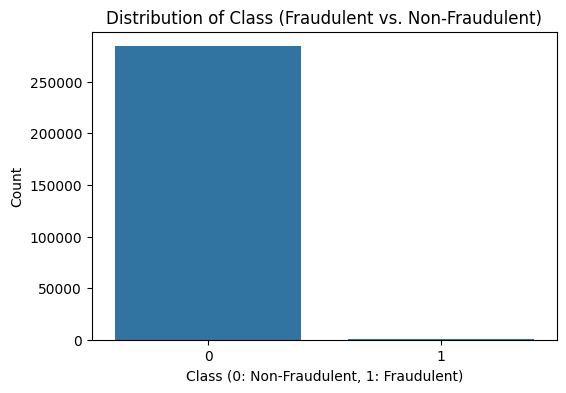


Percentage of fraudulent transactions in the dataset: 0.1727%


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each class in y_train and y_test
train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

print("Class distribution in y_train:")
print(train_class_counts)
print("\nClass distribution in y_test:")
print(test_class_counts)

# Create a countplot to visualize the distribution of the target variable (y)
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Class (Fraudulent vs. Non-Fraudulent)')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

# Calculate and print the percentage of fraudulent transactions
fraud_percentage = (y.sum() / len(y)) * 100
print(f"\nPercentage of fraudulent transactions in the dataset: {fraud_percentage:.4f}%")

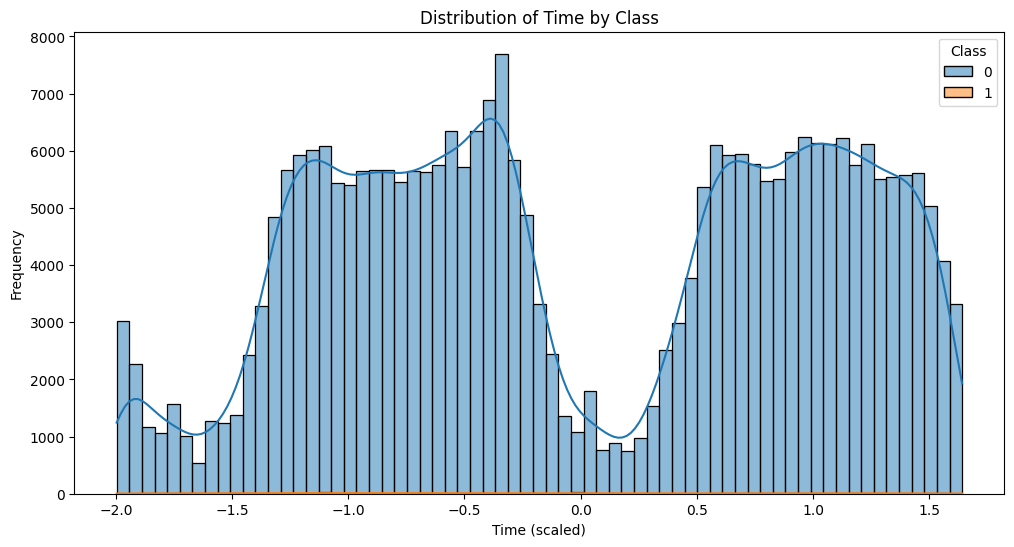

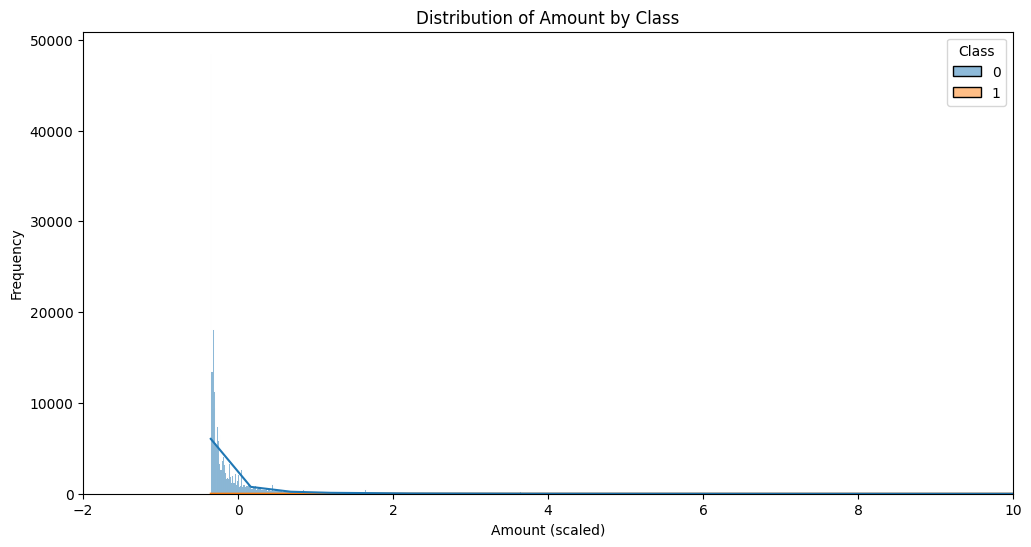

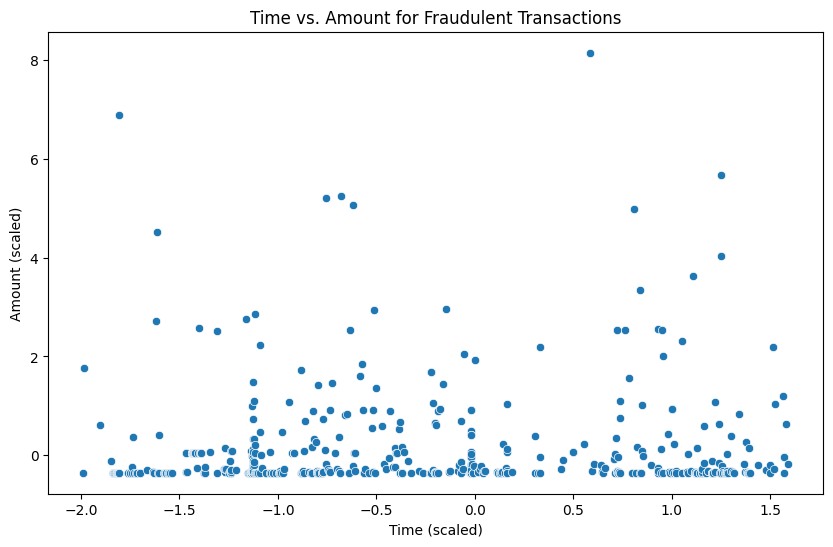

In [4]:
# Convert X_scaled back to a DataFrame for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Class'] = y

# Explore the distribution of 'Time' for both classes
plt.figure(figsize=(12, 6))
sns.histplot(data=X_scaled_df, x='Time', hue='Class', kde=True, common_norm=False)
plt.title('Distribution of Time by Class')
plt.xlabel('Time (scaled)')
plt.ylabel('Frequency')
plt.show()

# Explore the distribution of 'Amount' for both classes
plt.figure(figsize=(12, 6))
sns.histplot(data=X_scaled_df, x='Amount', hue='Class', kde=True, common_norm=False)
plt.title('Distribution of Amount by Class')
plt.xlabel('Amount (scaled)')
plt.ylabel('Frequency')
plt.xlim([-2, 10]) # Limit x-axis for better visualization of the majority of data
plt.show()

# Visualize the relationship between 'Time' and 'Amount' for fraudulent transactions
fraud_df = X_scaled_df[X_scaled_df['Class'] == 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fraud_df, x='Time', y='Amount')
plt.title('Time vs. Amount for Fraudulent Transactions')
plt.xlabel('Time (scaled)')
plt.ylabel('Amount (scaled)')
plt.show()

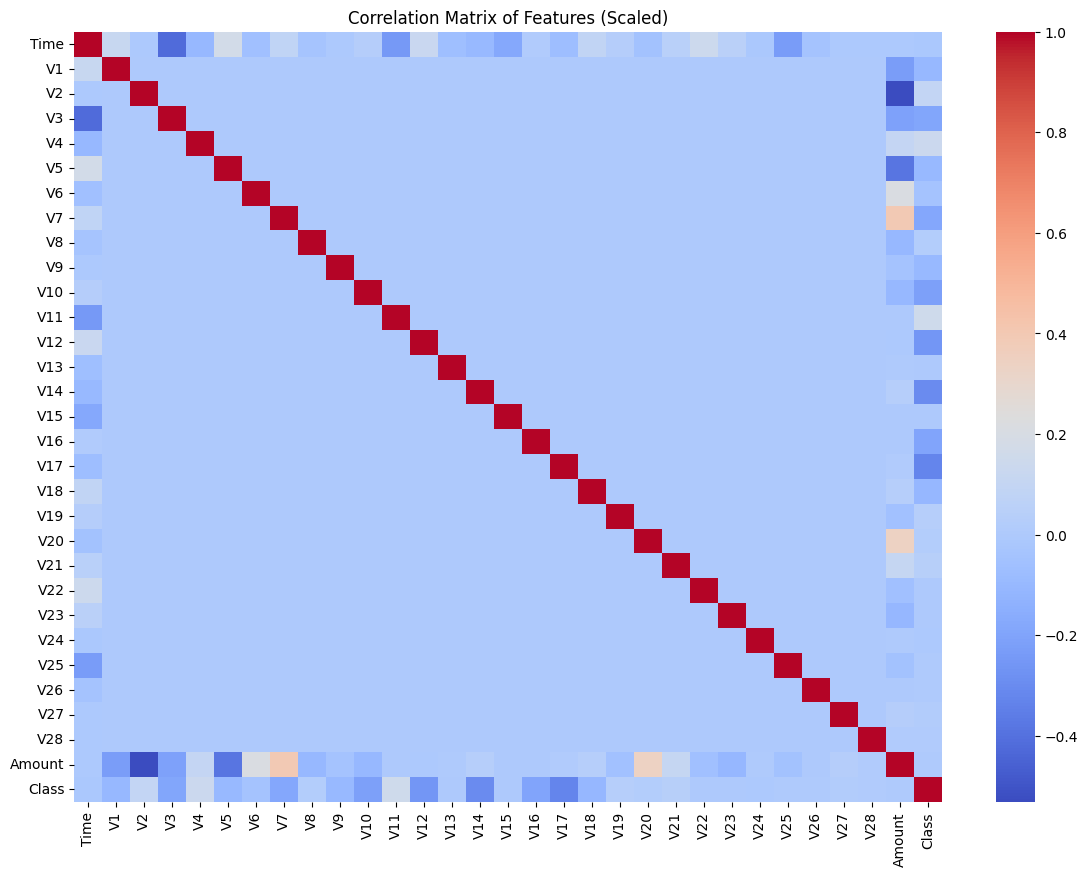


Correlation with Class variable:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [5]:
# Analyze the correlations between features and the 'Class' variable
correlation_matrix = X_scaled_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features (Scaled)')
plt.show()

# Display correlations with the 'Class' variable
print("\nCorrelation with Class variable:")
print(correlation_matrix['Class'].sort_values(ascending=False))

In [6]:
# 1. Create new features based on the 'Time' column
# Assuming 'Time' is in seconds, convert to hours and potentially day of the week (if relevant range)
# Max time is around 172792 seconds, which is less than 2 days.
# So, hour of the day is more relevant than day of the week.
X_scaled_df['Hour'] = (X_scaled_df['Time'] / 3600) % 24

# 2. Consider creating interaction terms between relevant features
# Based on EDA, V11, V4, V14, V17 showed some correlation with 'Class'.
# Let's create a few interaction terms with potentially relevant combinations.
# Using scaled features for interaction terms
X_scaled_df['V4_V11'] = X_scaled_df['V4'] * X_scaled_df['V11']
X_scaled_df['V14_V17'] = X_scaled_df['V14'] * X_scaled_df['V17']

# 3. Add these new features to the scaled feature DataFrame (already done in steps 1 and 2)

# 4. Drop the original 'Time' column
X_engineered = X_scaled_df.drop(['Time', 'Class'], axis=1)
y_engineered = X_scaled_df['Class']

# 5. Separate the engineered features (X_engineered) and the target variable (y_engineered)
# This was done in step 4

# 6. Split the engineered data into training and testing sets
# Use the same stratification strategy and random state as before
X_train_engineered, X_test_engineered, y_train_engineered, y_test_engineered = train_test_split(
    X_engineered, y_engineered, test_size=0.25, random_state=42, stratify=y_engineered
)

print("Shape of X_train_engineered:", X_train_engineered.shape)
print("Shape of X_test_engineered:", X_test_engineered.shape)
print("Shape of y_train_engineered:", y_train_engineered.shape)
print("Shape of y_test_engineered:", y_test_engineered.shape)

Shape of X_train_engineered: (213605, 32)
Shape of X_test_engineered: (71202, 32)
Shape of y_train_engineered: (213605,)
Shape of y_test_engineered: (71202,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Instantiate the models
# Logistic Regression with balanced class weight
log_reg = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

# Random Forest Classifier with balanced class weight
# Using a smaller number of estimators for quicker training, can be tuned later
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

# Gradient Boosting Classifier (does not support class_weight directly, will handle imbalance later if needed)
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Support Vector Classifier (can be slow on large datasets, using a smaller subset or different kernel might be needed)
# Using a small C for regularization, can be tuned later. Also using balanced class weight.
# Note: SVC can be very slow, especially on this dataset size. Consider alternative models or sampling.
# For demonstration, let's use a linear kernel and a smaller subset if needed, but try full data first.
# svc_clf = SVC(kernel='linear', random_state=42, class_weight='balanced') # May be too slow

# Train the models
print("Training Logistic Regression...")
log_reg.fit(X_train_engineered, y_train_engineered)
print("Logistic Regression trained.")

print("Training Random Forest Classifier...")
rf_clf.fit(X_train_engineered, y_train_engineered)
print("Random Forest Classifier trained.")

print("Training Gradient Boosting Classifier...")
gb_clf.fit(X_train_engineered, y_train_engineered)
print("Gradient Boosting Classifier trained.")

Training Logistic Regression...
Logistic Regression trained.
Training Random Forest Classifier...
Random Forest Classifier trained.
Training Gradient Boosting Classifier...
Gradient Boosting Classifier trained.


In [8]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Evaluate Logistic Regression
print("--- Logistic Regression Evaluation ---")
y_pred_log_reg = log_reg.predict(X_test_engineered)
print(classification_report(y_test_engineered, y_pred_log_reg))

y_pred_proba_log_reg = log_reg.predict_proba(X_test_engineered)[:, 1]
roc_auc_log_reg = roc_auc_score(y_test_engineered, y_pred_proba_log_reg)
print(f"ROC-AUC Score: {roc_auc_log_reg:.4f}")

precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test_engineered, y_pred_proba_log_reg)
auprc_log_reg = auc(recall_log_reg, precision_log_reg)
print(f"AUPRC: {auprc_log_reg:.4f}\n")


# Evaluate Random Forest Classifier
print("--- Random Forest Classifier Evaluation ---")
y_pred_rf_clf = rf_clf.predict(X_test_engineered)
print(classification_report(y_test_engineered, y_pred_rf_clf))

y_pred_proba_rf_clf = rf_clf.predict_proba(X_test_engineered)[:, 1]
roc_auc_rf_clf = roc_auc_score(y_test_engineered, y_pred_proba_rf_clf)
print(f"ROC-AUC Score: {roc_auc_rf_clf:.4f}")

precision_rf_clf, recall_rf_clf, _ = precision_recall_curve(y_test_engineered, y_pred_proba_rf_clf)
auprc_rf_clf = auc(recall_rf_clf, precision_rf_clf)
print(f"AUPRC: {auprc_rf_clf:.4f}\n")

# Evaluate Gradient Boosting Classifier
print("--- Gradient Boosting Classifier Evaluation ---")
y_pred_gb_clf = gb_clf.predict(X_test_engineered)
print(classification_report(y_test_engineered, y_pred_gb_clf))

y_pred_proba_gb_clf = gb_clf.predict_proba(X_test_engineered)[:, 1]
roc_auc_gb_clf = roc_auc_score(y_test_engineered, y_pred_proba_gb_clf)
print(f"ROC-AUC Score: {roc_auc_gb_clf:.4f}")

precision_gb_clf, recall_gb_clf, _ = precision_recall_curve(y_test_engineered, y_pred_proba_gb_clf)
auprc_gb_clf = auc(recall_gb_clf, precision_gb_clf)
print(f"AUPRC: {auprc_gb_clf:.4f}\n")

--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

ROC-AUC Score: 0.9735
AUPRC: 0.7437

--- Random Forest Classifier Evaluation ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.72      0.82       123

    accuracy                           1.00     71202
   macro avg       0.98      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202

ROC-AUC Score: 0.9464
AUPRC: 0.8513

--- Gradient Boosting Classifier Evaluation ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.72      0.7

In [9]:
from sklearn.ensemble import IsolationForest

# Calculate the contamination factor based on the fraud percentage
# fraud_percentage was calculated earlier in EDA
contamination_factor = fraud_percentage / 100

# Instantiate the Isolation Forest model
# Setting contamination to the calculated percentage of fraudulent transactions
iso_forest = IsolationForest(contamination=contamination_factor, random_state=42)

# Fit the model to the engineered training data
print("Fitting Isolation Forest model...")
iso_forest.fit(X_train_engineered)
print("Isolation Forest model fitted.")

Fitting Isolation Forest model...
Isolation Forest model fitted.


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict anomaly scores on the engineered test data
# The decision_function returns the anomaly score. Lower scores indicate higher anomaly likelihood.
# We can use these scores to evaluate performance.
anomaly_scores_test = iso_forest.decision_function(X_test_engineered)

# Predict anomaly labels (-1 for anomalies, 1 for inliers)
# The predict method returns -1 for anomalies and 1 for normal points.
# To align with our Class labels (0 for normal, 1 for fraud), we can convert.
# Anomaly detection models often define anomalies as -1.
# If we consider fraud (Class 1) as anomalies, we need to map -1 to 1 and 1 to 0.
y_pred_anomaly_labels = iso_forest.predict(X_test_engineered)

# Convert anomaly labels (-1, 1) to match our Class labels (1, 0) for evaluation
# -1 (anomaly) -> 1 (fraud)
# 1 (inlier) -> 0 (non-fraud)
y_pred_mapped = pd.Series(y_pred_anomaly_labels).apply(lambda x: 1 if x == -1 else 0).values

# Evaluate the performance of the anomaly detection model
# We will focus on the metrics for the '1' class (fraud/anomalies)
print("\n--- Isolation Forest Anomaly Detection Evaluation ---")
print(classification_report(y_test_engineered, y_pred_mapped, target_names=['Non-Fraud (0)', 'Fraud (1)']))

# Print confusion matrix for better understanding of predictions
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_engineered, y_pred_mapped))

# While ROC-AUC and AUPRC are typically for probabilistic models,
# we can still calculate them using the anomaly scores as a measure of anomaly likelihood.
# Lower anomaly score means higher likelihood of being an anomaly (fraud).
# So, we can use -anomaly_scores_test as a "fraud probability" for AUC/AUPRC calculation.
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

roc_auc_iso_forest = roc_auc_score(y_test_engineered, -anomaly_scores_test)
print(f"ROC-AUC Score (using negative anomaly scores): {roc_auc_iso_forest:.4f}")

precision_iso_forest, recall_iso_forest, _ = precision_recall_curve(y_test_engineered, -anomaly_scores_test)
auprc_iso_forest = auc(recall_iso_forest, precision_iso_forest)
print(f"AUPRC (using negative anomaly scores): {auprc_iso_forest:.4f}")


--- Isolation Forest Anomaly Detection Evaluation ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     71079
    Fraud (1)       0.26      0.28      0.27       123

     accuracy                           1.00     71202
    macro avg       0.63      0.64      0.63     71202
 weighted avg       1.00      1.00      1.00     71202


Confusion Matrix:
[[70983    96]
 [   89    34]]
ROC-AUC Score (using negative anomaly scores): 0.9511
AUPRC (using negative anomaly scores): 0.2047


In [13]:
%%markdown
## Scaling Fraud Detection to Large Datasets

Scaling a fraud detection solution to handle large datasets requires careful consideration across several dimensions:

### Data Storage and Processing
Handling terabytes or petabytes of transaction data necessitates moving beyond traditional file systems.
*   **Distributed File Systems:** Systems like HDFS (Hadoop Distributed File System) or cloud-based object storage (e.g., Amazon S3, Google Cloud Storage) provide scalable and fault-tolerant storage.
*   **Big Data Processing Frameworks:** Frameworks like Apache Spark or Dask enable distributed processing of large datasets, allowing for efficient data cleaning, preprocessing, and feature engineering in parallel across a cluster of machines.

### Model Training on Large Datasets
Training complex models on massive datasets can be computationally intensive.
*   **Distributed Training Frameworks:** Libraries and frameworks such as TensorFlow Extended (TFX), PyTorch Distributed, or Spark MLlib are designed to train machine learning models across multiple nodes in a cluster, significantly reducing training time.
*   **Model Parallelism and Data Parallelism:** Implementing strategies like model parallelism (distributing the model across devices) and data parallelism (distributing the data across devices) can help accelerate training.

### Real-time Inference at Scale
Providing low-latency fraud predictions for a high volume of incoming transactions requires a robust inference system.
*   **Distributed Inference Systems:** Using distributed systems for model serving, such as TensorFlow Serving, TorchServe, or leveraging container orchestration platforms like Kubernetes with auto-scaling, can handle a large number of inference requests concurrently.
*   **Efficient Model Serving:** Optimizing model size, using techniques like model quantization, and employing efficient serialization formats can reduce latency and improve throughput.
*   **Edge Computing:** For applications where latency is critical, deploying smaller models closer to the data source (edge devices) can be beneficial.

### Infrastructure Considerations
The underlying infrastructure plays a crucial role in supporting a scalable solution.
*   **Cloud Computing:** Cloud platforms offer on-demand access to vast computing resources, storage, and specialized services for big data and machine learning. This allows for flexible scaling based on demand.
*   **Auto-scaling:** Implementing auto-scaling mechanisms ensures that the infrastructure can automatically adjust its capacity in response to fluctuations in workload, optimizing resource utilization and cost.
*   **Monitoring and Alerting:** Robust monitoring and alerting systems are essential to detect performance bottlenecks, system failures, and potential issues in real-time, ensuring the reliability of the fraud detection system.
*   **Cost Management:** As scale increases, managing infrastructure costs becomes critical. Utilizing cost-effective storage options, optimizing compute instances, and implementing efficient data processing pipelines are important considerations.

## Scaling Fraud Detection to Large Datasets

Scaling a fraud detection solution to handle large datasets requires careful consideration across several dimensions:

### Data Storage and Processing
Handling terabytes or petabytes of transaction data necessitates moving beyond traditional file systems.
*   **Distributed File Systems:** Systems like HDFS (Hadoop Distributed File System) or cloud-based object storage (e.g., Amazon S3, Google Cloud Storage) provide scalable and fault-tolerant storage.
*   **Big Data Processing Frameworks:** Frameworks like Apache Spark or Dask enable distributed processing of large datasets, allowing for efficient data cleaning, preprocessing, and feature engineering in parallel across a cluster of machines.

### Model Training on Large Datasets
Training complex models on massive datasets can be computationally intensive.
*   **Distributed Training Frameworks:** Libraries and frameworks such as TensorFlow Extended (TFX), PyTorch Distributed, or Spark MLlib are designed to train machine learning models across multiple nodes in a cluster, significantly reducing training time.
*   **Model Parallelism and Data Parallelism:** Implementing strategies like model parallelism (distributing the model across devices) and data parallelism (distributing the data across devices) can help accelerate training.

### Real-time Inference at Scale
Providing low-latency fraud predictions for a high volume of incoming transactions requires a robust inference system.
*   **Distributed Inference Systems:** Using distributed systems for model serving, such as TensorFlow Serving, TorchServe, or leveraging container orchestration platforms like Kubernetes with auto-scaling, can handle a large number of inference requests concurrently.
*   **Efficient Model Serving:** Optimizing model size, using techniques like model quantization, and employing efficient serialization formats can reduce latency and improve throughput.
*   **Edge Computing:** For applications where latency is critical, deploying smaller models closer to the data source (edge devices) can be beneficial.

### Infrastructure Considerations
The underlying infrastructure plays a crucial role in supporting a scalable solution.
*   **Cloud Computing:** Cloud platforms offer on-demand access to vast computing resources, storage, and specialized services for big data and machine learning. This allows for flexible scaling based on demand.
*   **Auto-scaling:** Implementing auto-scaling mechanisms ensures that the infrastructure can automatically adjust its capacity in response to fluctuations in workload, optimizing resource utilization and cost.
*   **Monitoring and Alerting:** Robust monitoring and alerting systems are essential to detect performance bottlenecks, system failures, and potential issues in real-time, ensuring the reliability of the fraud detection system.
*   **Cost Management:** As scale increases, managing infrastructure costs becomes critical. Utilizing cost-effective storage options, optimizing compute instances, and implementing efficient data processing pipelines are important considerations.
